In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import jb_helper_functions_prep
from jb_helper_functions_prep import create_enc

import prep_telco
from prep_telco import prep_telco_df

from sklearn.model_selection import train_test_split

In [4]:
df = prep_telco_df()
df.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,onlinesecurity_enc,onlinebackup_enc,deviceprotection_enc,techsupport_enc,streamingtv_enc,streamingmovies_enc,contract_enc,paperlessbilling_enc,paymentmethod_enc,churn_enc
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,2,2,0,0,0,0,0,1,3,1


In [5]:
train, test = train_test_split(df, test_size=.3, random_state=123, stratify=df[['churn_enc']])

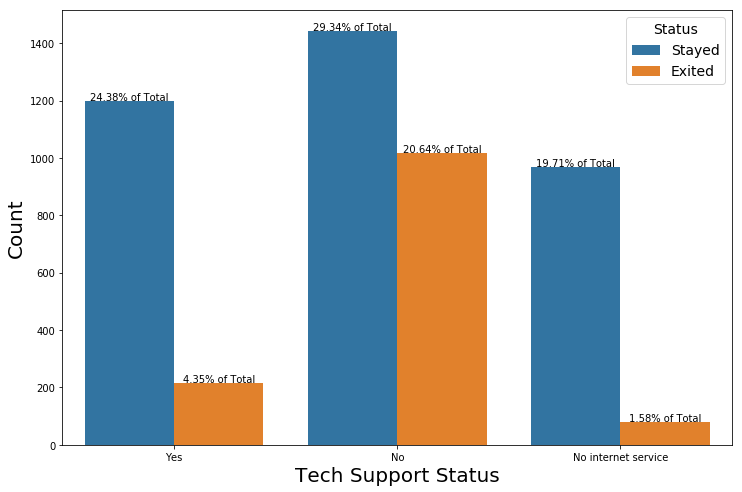

In [6]:
plt.figure(figsize=(12,8))
total = float(len(train))
ax = sns.countplot(x='techsupport', hue='churn', data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height +3,
           '{:1.2f}'.format(height/total*100)+'% of Total',
           ha="center")
plt.legend(title='Status', labels=['Stayed', 'Exited'], fontsize=14, title_fontsize=14)
ax.set_xlabel('Tech Support Status', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
plt.show()

### The gaps between customers that churn and don't churn is much larger for those that do not have tech support.

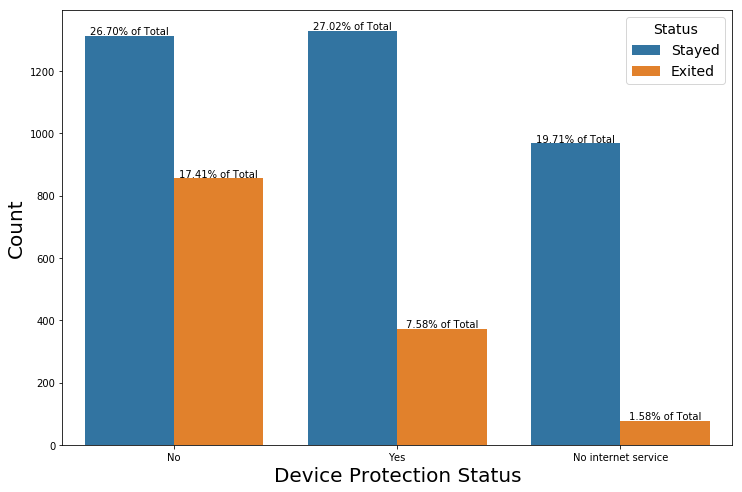

In [9]:
plt.figure(figsize=(12,8))
total = float(len(train))
ax = sns.countplot(x='deviceprotection', hue='churn', data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height +3,
           '{:1.2f}'.format(height/total*100)+'% of Total',
           ha="center")
plt.legend(title='Status', labels=['Stayed', 'Exited'], fontsize=14, title_fontsize=14)
ax.set_xlabel('Device Protection Status', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
plt.show()

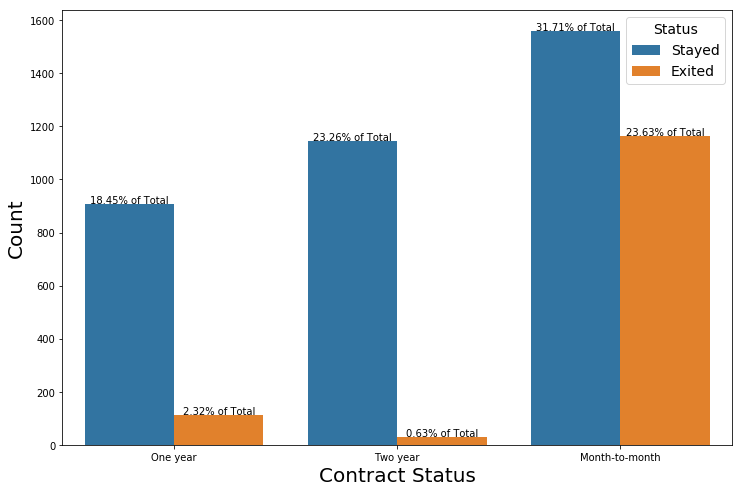

In [7]:
plt.figure(figsize=(12,8))
total = float(len(train))
ax = sns.countplot(x='contract', hue='churn', data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height +3,
           '{:1.2f}'.format(height/total*100)+'% of Total',
           ha="center")
plt.legend(title='Status', labels=['Stayed', 'Exited'], fontsize=14, title_fontsize=14)
ax.set_xlabel('Contract Status', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
plt.show()

### Similar to above, month-to-month customers churn at higher rate, as expected.

In [13]:
df1 = train.groupby(['churn', 'techsupport'])['monthlycharges'].sum()

In [ ]:
# groups = ['No Churn, No Tech', 'No Churn, No Internet', 'No Churn, Yes Tech', 'Yes Churn, No Tech', 'Yes Churn, No Internet', 'Yes Churn, Yes Tech']
# pattern = '|'.join(groups)


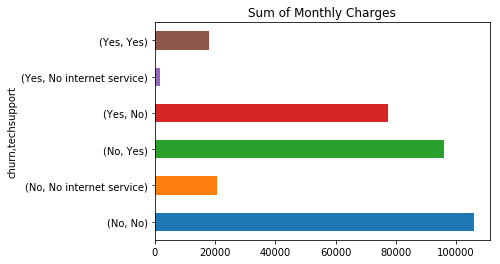

In [15]:
df1.plot.barh(title = 'Sum of Monthly Charges')
plt.show()